# Summer 2024 AZMP Drifter Deployment Plan

We plan to deploy several drifters at AZMP stations during the Fall 2024 cruise. This document outlines the drifter inventory and ideal deployment locations.

Tentative Dates: October 28 – November 23, 2024

## Goals
* Create an inventory of drifter data on NL Shelf for model evaluation 
* Transmit data to GTS to support operational weather and ocean forecasting


## Drifter Inventory
| Name       | Type    | Quantity | Data collected                |
|------------|---------|----------|-------------------------------|
| iSVP       | Drogued | 5        | Position/Temperature/Pressure |



## Deployment Areas

1. Seal Island Line
2. Bonavista Line
3. Flemish Cap Line

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import glob
import os

import numpy as np
import xarray as xr
import yaml

%matplotlib inline

In [2]:
lat_min=42
lon_min=-60
lat_max=56
lon_max=-40

In [3]:
# Glorys climatology
f='/ocean/handres/glorys12/Allvars_glorys12_1993-2018_daily11.nc'
d = xr.open_dataset(f)
dsel = d.isel(depth=0).sel(latitude=slice(lat_min,lat_max), longitude=slice(lon_min, lon_max)).mean(dim='time')
uvel = dsel.uo.values
vvel = dsel.vo.values
lat = dsel.latitude.values
lon = dsel.longitude.values
lon, lat = np.meshgrid(lon, lat)

In [4]:
drifter_dir = '../cmems-NLdeployments/INSITU_GLO_PHY_UV_DISCRETE_NRT_013_048/cmems_obs-ins_glo_phy-cur_nrt_drifter_irr_202311/'
drifterID_file = '../cmems-NLdeployments/NLDrifterIDs.yaml'
with open(drifterID_file) as f:
    deployments = yaml.safe_load(f)


In [5]:
# etopo file
ef = '/home/soontiensn/data/ocn-nav/ETOPO1_Bed_g_gmt4.grd'
etopo = xr.open_dataset(ef)
esel = etopo.sel(x=slice(lon_min, lon_max), y=slice(lat_min, lat_max))

In [6]:
def gather_data(ID, data_dir):
    """Open xarray dataset for files associated with a drifter ID"""
    files = glob.glob(os.path.join(data_dir, 'monthly', '*', f'*{ID}*.nc'))
    if not files:
        files = glob.glob(os.path.join(data_dir, 'latest', '*', f'*{ID}*.nc'))
    if not files:
        print(f'No files found for ID {ID}')
        return None
    d = xr.open_mfdataset(files)
    return d

In [7]:
def plot_quivers(ax, xvel,yvel,lat,lon,st=10):
    mag = np.sqrt(xvel**2+yvel**2)
    mesh=ax.pcolormesh(lon,lat,mag,vmin=0,vmax=1,cmap='YlGnBu_r', transform=ccrs.PlateCarree())
    q=ax.quiver(lon[::st,::st],lat[::st,::st],xvel[::st,::st],yvel[::st,::st],
                  scale=10,color='lightgrey', transform=ccrs.PlateCarree())
    ax.quiverkey(q,0.2,0.46,0.5,'0.5 m/s',color='lightgrey')
    cbar=plt.colorbar(mesh, ax=ax)
    cbar.set_label('speed [m/s]')

In [8]:
def plot_transects(ax,transects):
    for transect in transects:
        lons = np.array([transects[transect]['start'][0],
                         transects[transect]['end'][0]])
        lats = np.array([transects[transect]['start'][1],
                         transects[transect]['end'][1]])
        ax.plot(lons, lats,'-r', transform=ccrs.PlateCarree())

In [9]:
def plot_stations(ax,stations):
    for station in stations:
        lon = stations[station][0]
        lat = stations[station][1]
        marker='o'
        #if 'BB' in station:
        #    marker='o'
        #else:
        #    marker = 's'
        ax.plot(lon, lat,marker, label=station, markeredgecolor='k',markersize=10, transform=ccrs.PlateCarree())

In [10]:
def plot_bathymetry( ax, etopo):
    lons = etopo.x.values
    lats = etopo.y.values
    lons, lats = np.meshgrid(lons,lats)
    bathy = etopo.z.values
    levels = [-500, -200, -100,]
    CS = ax.contour(lons,lats,bathy,levels, linestyles='solid', linewidth=0.1,colors='black',transform=ccrs.PlateCarree())
    ax.clabel(CS, CS.levels, inline=True, fmt='%1.0f', fontsize=12)

# Plots

In [11]:
transects = {
    'BB': {'start': [-52.9666666666667,48.7333333333333],
           'end': [-47.9466666666667,50.3316666666667]},
    'SI': {'start': [-55.65,53.233],
           'end': [-52.5,55.067]},
    'FC': {'start':[ -52.8316666666667, 47],
           'end': [-42, 47]},
    #'S27': {'start': [-52.5866666666667,47.5466666666667],
    #        'end': [-48.41,48.4333333333333]}
}
stations = {
    #'BB-01': [-52.9666666666667,48.7333333333333],
    #'BB-02': [-52.75,48.8],
    #'BB-03 \n 3 Stokes \n 1 Code/Davis': [-52.65,48.8333333333333],
    #'BB-04 \n 3 Stokes \n 1 Code/Davis': [-52.4,48.9166666666667],
    #'BB-05': [-52.0666666666667,49.025],
    #'BB-06': [-51.83, 49.10],
    #'BB-07': [-51.54, 49.19],
    #'BB-08': [-51.28,49.28],
    #'BB-11': [-50.0166666666667,49.6833333333333],
    'BB-13': [-49, 50], 
    'BB-14': [-48.4716666666667,50.1766666666667],
    #'BB-15': [-47.9466666666667,50.3316666666667],
    #'SI-01': [-55.650, 53.233 ],
    #'SI-02': [-55.500, 53.333 ],
    #'SI-03': [-55.357, 53.410 ],
    #'SI-04': [-55.145, 53.533 ],
    #'SI-05': [-55.000, 53.617 ],
    #'SI-06': [-54.777, 53.757 ], 
    #'SI-07': [-54.500, 53.917 ],
    #'SI-11': [-53.500, 54.500 ],
    #'SI-12': [-53.250, 54.633 ],
    #'SI-13': [-53.000, 54.783 ],
    'SI-14': [-52.500, 55.067 ],
    #'FC-06': [-51.485,47],
    #'FC-09': [-50,47],
    'FC-15': [-47.25,47],
    #'FC-17': [-47.0166666666667,47],
    #'FC-20': [-46.4833333333333,47],
    'FC-25': [-44.9883333333333,47],
    #'FC-26': [-44.772,47.000],
    #'FC-31': [-43.833,47.000],
    #'FC-38': [-42,47], 
    #'S27-05': [-51.65,47.74],
    #'S27-10': [-50.48,47.99]
}

/home/soontiensn/miniconda-new/envs/cilglorys/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:1600: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = super().contour(*args, **kwargs)


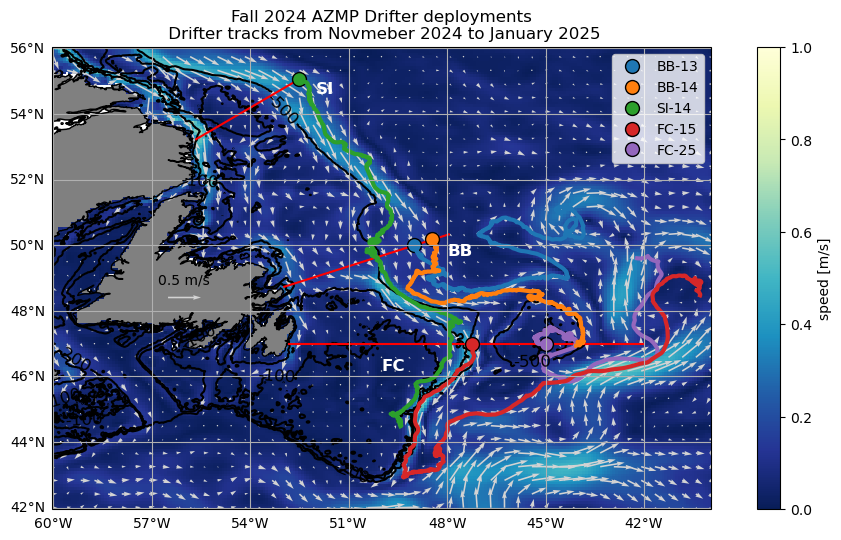

In [12]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1,projection = ccrs.PlateCarree())
plot_quivers(ax,uvel,vvel,lat, lon,st=5)
plot_bathymetry( ax, esel)
plot_transects(ax, transects)
plot_stations(ax, stations)

ax.text(0.6,0.55, 'BB', fontsize=12,color='w', transform=ax.transAxes,fontweight='bold')
ax.text(0.4,0.9, 'SI', fontsize=12,color='w', transform=ax.transAxes,fontweight='bold')
ax.text(0.5,0.3, 'FC', fontsize=12,color='w', transform=ax.transAxes,fontweight='bold')
#ax.text(0.6,0.3, 'S27', fontsize=12,color='w', transform=ax.transAxes,fontweight='bold')
ax.set_title('Fall 2024 AZMP Drifter deployments\n Drifter tracks from Novmeber 2024 to January 2025')
ax.legend(loc='upper right')

cs=['C2','C4', 'C0', 'C1', 'C3']
for ID, c in zip(deployments['NLFallAZMP2024'], cs):
    try:
        d = gather_data(ID, drifter_dir)
    except ValueError:
        files = glob.glob(os.path.join(drifter_dir, 'monthly', '*', f'*{ID}*.nc'))
        files.sort()
        d = xr.open_dataset(files[0])
        d = d.isel(DEPTH=-1)
        for f in files[1:]:
            dnew = xr.open_dataset(f)
            dnew = dnew.isel(DEPTH=-1)
            d = xr.concat([d,dnew],dim='TIME')
            
    ax.plot(d.LONGITUDE, d.LATITUDE,  '-',color=c,lw=3,transform=ccrs.PlateCarree())

ax.coastlines()
ax.gridlines(draw_labels=['bottom', 'left'])
ax.add_feature(cfeature.LAND, color='grey')

In [13]:
fig.savefig('Fall2024deploymentplanCurrents-withtracks.png', bbox_inches='tight')

/home/soontiensn/miniconda-new/envs/cilglorys/lib/python3.12/site-packages/cartopy/mpl/geoaxes.py:1600: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = super().contour(*args, **kwargs)


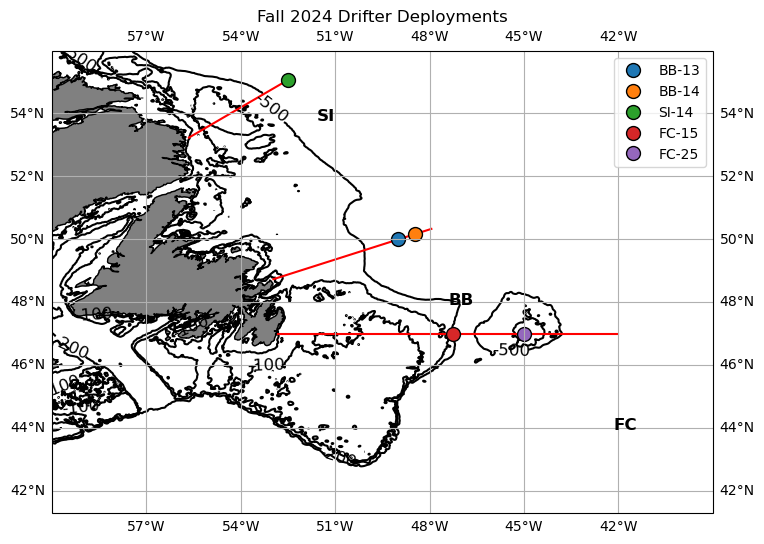

In [14]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1,projection = ccrs.PlateCarree())
#plot_quivers(ax,uvel,vvel,lat, lon,st=3)
plot_bathymetry( ax, esel)
plot_transects(ax, transects)
plot_stations(ax, stations)

ax.text(0.6,0.45, 'BB', fontsize=12,color='k', transform=ax.transAxes,fontweight='bold')
ax.text(0.4,0.85, 'SI', fontsize=12,color='k', transform=ax.transAxes,fontweight='bold')
ax.text(0.85,0.18, 'FC', fontsize=12,color='k', transform=ax.transAxes,fontweight='bold')
#ax.text(0.6,0.3, 'S27', fontsize=12,color='w', transform=ax.transAxes,fontweight='bold')
ax.set_title('Fall 2024 Drifter Deployments')
ax.legend(loc='upper right')

ax.coastlines()
ax.gridlines(draw_labels=True)
ax.add_feature(cfeature.LAND, color='grey')
